### Imports and utility functions

In [2]:
import pandas as pd
from collections import Counter
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import shutil
import cv2

# function to visualise images of a celebrity
def show_images_for_celebrity(celebrity_id, annotations, images_dir):
    celeb_images = annotations[annotations['celebrity_id'] == celebrity_id]['image']
    fig, ax = plt.subplots(1, 20, figsize=(20, 2))
    fig.suptitle(f'Celebrity ID: {celebrity_id}', size=16)
    
    for img_file, ax in zip(celeb_images, ax):
        img_path = os.path.join(images_dir, img_file)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()


# Function to resize image
def resize_image(image_path, size):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, size)
    return resized_image

## Creation of the mated subdataset
### save original pictures of the same celebrity (50 celebrities, 20 photos each)

In [96]:
import os
import shutil
import pandas as pd
from collections import Counter


# Load the annotation file
annotation_file = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/identity_CelebA.txt'
annotations = pd.read_csv(annotation_file, delim_whitespace=True, header=None, names=['image', 'celebrity_id'])

# Count the number of images for each celebrity
celebrity_counts = Counter(annotations['celebrity_id'])

# Filter celebrities with exactly 20 images
celebrities_with_20_photos = [celebrity for celebrity, count in celebrity_counts.items() if count == 20]
print(f"celebrities with 20 photos each: {len(celebrities_with_20_photos)}")

# Select the first 50 celebrities with 20 photos each
first_50_celebrities = celebrities_with_20_photos[:50]

# Filter the annotations to get images of the first 50 celebrities
filtered_annotations = annotations[annotations['celebrity_id'].isin(first_50_celebrities)]

# Create the target directory if it doesn't exist
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'
os.makedirs(target_dir, exist_ok=True)

# Directory of the CelebA images
images_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/CelebA/img_align_celeba'

# Initialize a dictionary to keep track of the counts of images for each celebrity
celebrity_image_counts = {celebrity: 0 for celebrity in first_50_celebrities}

# List to store the names of the saved images
saved_image_names = []

# Save the photos of the first 50 celebrities into the new directory
for index, row in filtered_annotations.iterrows():
    image_name = row['image']
    celebrity_id = row['celebrity_id']
    
    # Increment the count for this celebrity
    celebrity_image_counts[celebrity_id] += 1
    image_count = celebrity_image_counts[celebrity_id]

     # Define the source and target paths
    source_path = os.path.join(images_dir, image_name)
    target_file_name = f"original_id{celebrity_id}_{image_count}.jpg"
    target_path = os.path.join(target_dir, target_file_name)
    
    # Resize the image
    resized_image = resize_image(source_path, (112, 112))
    # Save the resized image
    cv2.imwrite(target_path, resized_image)
    
    # Save the name of the original image to the list
    saved_image_names.append(f"toy_imgs/{target_file_name}")


print(f"Saved photos of the first 50 celebrities with 20 images each to {target_dir}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_15124\2567062071.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(annotation_file, delim_whitespace=True, header=None, names=['image', 'celebrity_id'])


celebrities with 20 photos each: 1044
Saved photos of the first 50 celebrities with 20 images each to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs


## Save filtered photos
## GAUSSIAN BLUR

In [88]:
# Define blur intensities
# blur_intensities = [9,13,17,21,25]
blur_intensities = [9,11,13,15,17,19,21,23,25]

# Save the photos of the first 50 celebrities into the new directory with the desired naming convention
for index, row in filtered_annotations.iterrows():
    image_name = row['image']
    celebrity_id = row['celebrity_id']
    
    # Increment the count for this celebrity
    celebrity_image_counts[celebrity_id] += 1
    image_count = celebrity_image_counts[celebrity_id]
    
    # Define the source path
    source_path = os.path.join(images_dir, image_name)
    
     # Open the image and resize it to 112x112
    img = resize_image(source_path, (112, 112))
    
    # Apply 5 different blur filters and save each version
    for i, intensity in enumerate(blur_intensities, start=1):
        # Apply Gaussian blur with the calculated kernel size
        blurred_img = cv2.GaussianBlur(img, (intensity, intensity), 0)
        target_file_name = f"blur{i}_id{celebrity_id}_{image_count}.jpg"
        target_path = os.path.join(target_dir, target_file_name)
        cv2.imwrite(target_path, blurred_img)
        
        # Save the name of the image to the list
        saved_image_names.append(f"toy_imgs/{target_file_name}")

# Write the saved image names to img.list
list_file_path = os.path.join(target_dir, 'img.list')
with open(list_file_path, 'w') as f:
    for name in saved_image_names:
        f.write(f"{name}\n")

print(f"Saved blurred photos of the first 50 celebrities with 20 images each to {target_dir}")
print(f"Saved image names to {list_file_path}")

Saved blurred photos of the first 50 celebrities with 20 images each to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs
Saved image names to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs\img.list


### Visualize blurred photos for paper

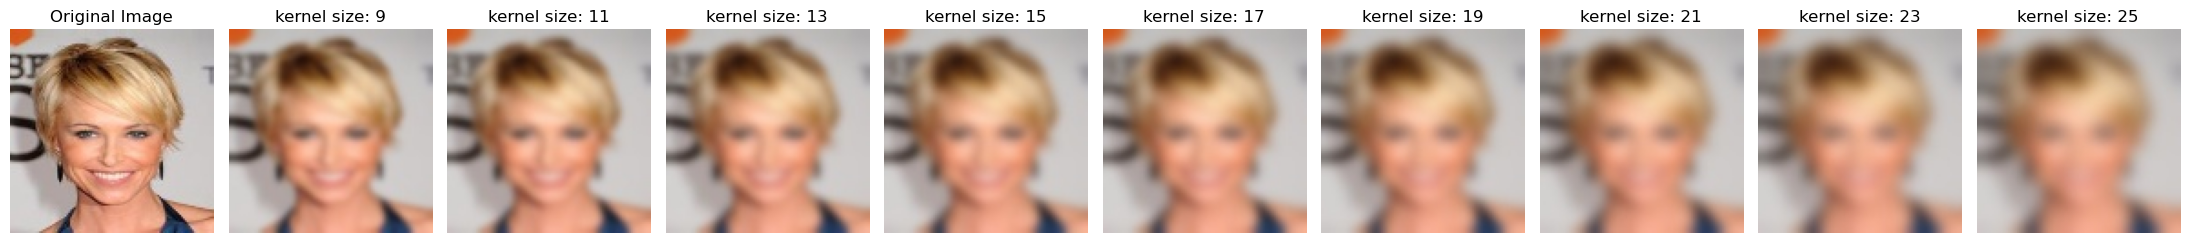

In [89]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory dove sono salvate le immagini pixelizzate
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'

# Lista dei nomi delle immagini
blur_image_names = [
    'original_id4929_13.jpg', 'blur1_id4929_33.jpg', 'blur2_id4929_33.jpg', 'blur3_id4929_33.jpg', 
    'blur4_id4929_33.jpg', 'blur5_id4929_33.jpg', 'blur6_id4929_33.jpg', 'blur7_id4929_33.jpg', 
    'blur8_id4929_33.jpg', 'blur9_id4929_33.jpg'
]

# Lista dei livelli di intensità di sfocatura
blur_intensities = [0, 9, 11, 13, 15, 17, 19, 21, 23, 25]  # L'indice 0 corrisponde all'immagine originale

# Carica le immagini e visualizzale con commenti
fig, axes = plt.subplots(1, len(blur_image_names), figsize=(22, 4))

for i, image_name in enumerate(blur_image_names):
    image_path = os.path.join(target_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    intensity = blur_intensities[i]

    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title('Original Image')
    else:
        axes[i].set_title(f'kernel size: {intensity}')

plt.tight_layout()
plt.show()


## MEDIAN BLUR

In [91]:
import os
import cv2

# Define blur intensities
blur_intensities = [5, 7, 9, 11, 13, 15, 17, 19, 21]

# Save the photos of the first 50 celebrities into the new directory with the desired naming convention
for index, row in filtered_annotations.iterrows():
    image_name = row['image']
    celebrity_id = row['celebrity_id']
    
    # Increment the count for this celebrity
    celebrity_image_counts[celebrity_id] += 1
    image_count = celebrity_image_counts[celebrity_id]
    
    # Define the source path
    source_path = os.path.join(images_dir, image_name)
    
    # Open the image and resize it to 112x112
    img = resize_image(source_path, (112, 112))
    
    # Apply 5 different blur filters and save each version
    for i, intensity in enumerate(blur_intensities, start=1):
        # Apply Median blur with the specified kernel size
        blurred_img = cv2.medianBlur(img, intensity)
        target_file_name = f"median_blur{i}_id{celebrity_id}_{image_count}.jpg"
        target_path = os.path.join(target_dir, target_file_name)
        cv2.imwrite(target_path, blurred_img)
        
        # Save the name of the image to the list
        saved_image_names.append(f"toy_imgs/{target_file_name}")

# Write the saved image names to img.list
list_file_path = os.path.join(target_dir, 'img.list')
with open(list_file_path, 'w') as f:
    for name in saved_image_names:
        f.write(f"{name}\n")

print(f"Saved median blurred photos of the first 50 celebrities with 20 images each to {target_dir}")
print(f"Saved image names to {list_file_path}")


Saved median blurred photos of the first 50 celebrities with 20 images each to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs
Saved image names to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs\img.list


### visualize median blur photos for paper

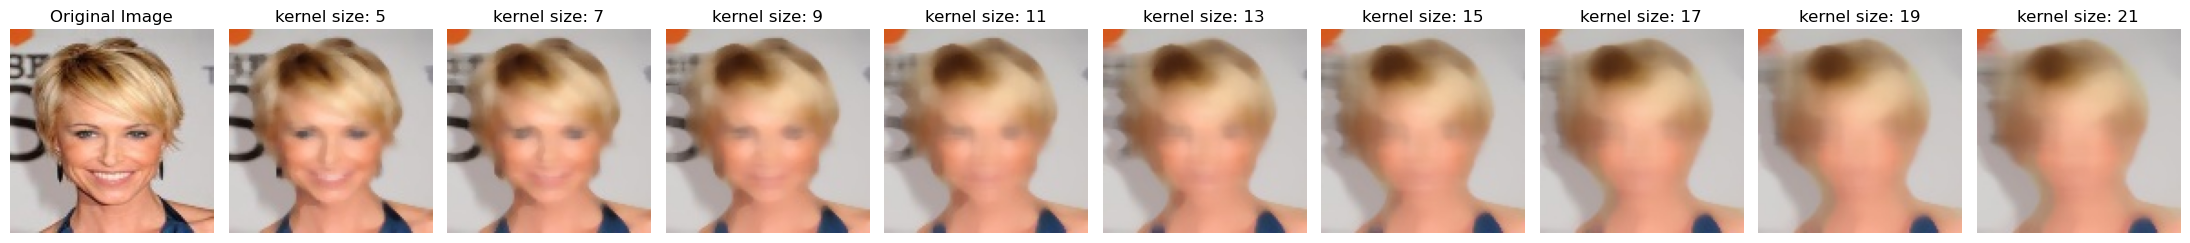

In [92]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory dove sono salvate le immagini pixelizzate
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'

# Lista dei nomi delle immagini
blur_image_names = [
    'original_id4929_13.jpg', 'median_blur1_id4929_33.jpg', 'median_blur2_id4929_33.jpg', 'median_blur3_id4929_33.jpg', 
    'median_blur4_id4929_33.jpg', 'median_blur5_id4929_33.jpg', 'median_blur6_id4929_33.jpg', 'median_blur7_id4929_33.jpg', 
    'median_blur8_id4929_33.jpg', 'median_blur9_id4929_33.jpg'
]

# Lista dei livelli di intensità di sfocatura
blur_intensities = [0, 5, 7, 9, 11, 13, 15, 17, 19, 21]  # L'indice 0 corrisponde all'immagine originale

# Carica le immagini e visualizzale con commenti
fig, axes = plt.subplots(1, len(blur_image_names), figsize=(22, 4))

for i, image_name in enumerate(blur_image_names):
    image_path = os.path.join(target_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    intensity = blur_intensities[i]

    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title('Original Image')
    else:
        axes[i].set_title(f'kernel size: {intensity}')

plt.tight_layout()
plt.show()


## PIXELIZATION

In [94]:
import cv2
import os

# Define pixelization intensities
pixelization_intensities = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Save the photos of the first 50 celebrities into the new directory with the desired naming convention
for index, row in filtered_annotations.iterrows():
    image_name = row['image']
    celebrity_id = row['celebrity_id']
    
    # Increment the count for this celebrity
    celebrity_image_counts[celebrity_id] += 1
    image_count = celebrity_image_counts[celebrity_id]
    
    # Define the source path
    source_path = os.path.join(images_dir, image_name)
    
    # Open the image and resize it to 112x112
    img = resize_image(source_path, (112, 112))
    
    # Apply 9 different pixelization filters and save each version
    for i, intensity in enumerate(pixelization_intensities, start=1):
        # Resize the image to introduce pixelization
        resized_img = cv2.resize(img, (intensity, intensity), interpolation=cv2.INTER_NEAREST)
        
        # Resize it back to original size to achieve pixelization effect
        pixelized_img = cv2.resize(resized_img, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        
        target_file_name = f"pixelization{len(pixelization_intensities)-i+1}_id{celebrity_id}_{image_count}.jpg"
        target_path = os.path.join(target_dir, target_file_name)
        cv2.imwrite(target_path, pixelized_img)
        
        # Save the name of the image to the list
        saved_image_names.append(f"toy_imgs/{target_file_name}")

# Write the saved image names to img.list
list_file_path = os.path.join(target_dir, 'img.list')
with open(list_file_path, 'w') as f:
    for name in saved_image_names:
        f.write(f"{name}\n")

print(f"Saved pixelized photos of the first 50 celebrities with 20 images each to {target_dir}")
print(f"Saved image names to {list_file_path}")


Saved pixelized photos of the first 50 celebrities with 20 images each to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs
Saved image names to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs\img.list


### visualize photos pixelated for paper

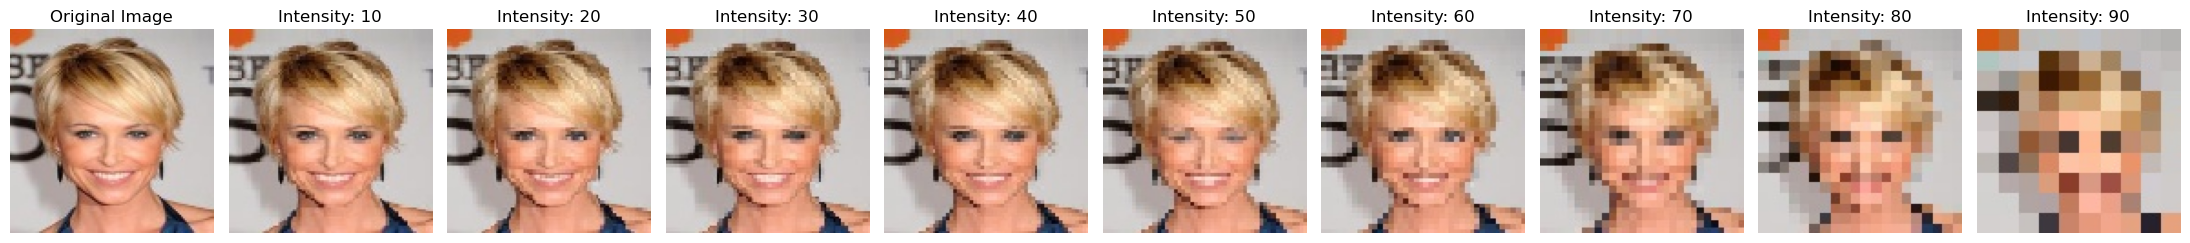

In [95]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory dove sono salvate le immagini pixelizzate
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'

# Lista dei nomi delle immagini
blur_image_names = [
    'original_id4929_13.jpg', 'pixelization1_id4929_33.jpg', 'pixelization2_id4929_33.jpg', 'pixelization3_id4929_33.jpg', 
    'pixelization4_id4929_33.jpg', 'pixelization5_id4929_33.jpg', 'pixelization6_id4929_33.jpg', 'pixelization7_id4929_33.jpg', 
    'pixelization8_id4929_33.jpg', 'pixelization9_id4929_33.jpg'
]

# Lista dei livelli di intensità di sfocatura
blur_intensities = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # L'indice 0 corrisponde all'immagine originale

# Carica le immagini e visualizzale con commenti
fig, axes = plt.subplots(1, len(blur_image_names), figsize=(22, 4))

for i, image_name in enumerate(blur_image_names):
    image_path = os.path.join(target_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    intensity = blur_intensities[i]

    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title('Original Image')
    else:
        axes[i].set_title(f'Intensity: {intensity}')

plt.tight_layout()
plt.show()


### BLACK STRIPES

In [97]:
import cv2
import os
import numpy as np

# Define opacity levels (30% to 100% in reverse order)
opacity_levels = [i / 10 for i in range(10, 2, -1)]  # Starts from 10 to 3, skipping 2

# Function to apply a black band with a given opacity over detected faces
def apply_black_band(image, faces, opacity, band_position='full'):
    for (x, y, w, h) in faces:
        if band_position == 'top':
            band_top = y
            band_bottom = y + h // 3
        elif band_position == 'middle':
            band_top = y + h // 3
            band_bottom = y + 2 * h // 3
        elif band_position == 'bottom':
            band_top = y + 2 * h // 3
            band_bottom = y + h
        else:  # Full face
            band_top = y
            band_bottom = y + h
        
        band = np.zeros((band_bottom - band_top, w, 3), dtype=np.uint8)
        blended_band = cv2.addWeighted(image[band_top:band_bottom, x:x + w], 1 - opacity, band, opacity, 0)
        image[band_top:band_bottom, x:x + w] = blended_band
    return image

# Save the photos of the first 50 celebrities into the new directory with the desired naming convention
for index, row in filtered_annotations.iterrows():
    image_name = row['image']
    celebrity_id = row['celebrity_id']
    
    # Increment the count for this celebrity
    celebrity_image_counts[celebrity_id] += 1
    image_count = celebrity_image_counts[celebrity_id]
    
    # Define the source path
    source_path = os.path.join(images_dir, image_name)
    
    # Open the image and resize it to 112x112
    img = resize_image(source_path, (112, 112))
    
    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Use OpenCV's face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    # Apply different opacity filters and save each version
    for i, opacity in enumerate(opacity_levels, start=1):
        img_copy = img.copy()
        masked_img = apply_black_band(img_copy, faces, opacity)
        
        # Adjust index for target file name
        target_file_name = f"mask_opacity{len(opacity_levels)-i+1}_id{celebrity_id}_{image_count}.jpg"
        target_path = os.path.join(target_dir, target_file_name)
        cv2.imwrite(target_path, masked_img)
        
        # Save the name of the image to the list
        saved_image_names.append(f"toy_imgs/{target_file_name}")
    
    # Save additional images with 100% opacity in different positions
    # Add the ninth image with 100% opacity covering only the middle third of the face
    img_copy = img.copy()
    masked_img = apply_black_band(img_copy, faces, 1.0, 'middle')
    
    target_file_name = f"mask_opacity9_id{celebrity_id}_{image_count}.jpg"
    target_path = os.path.join(target_dir, target_file_name)
    cv2.imwrite(target_path, masked_img)
    
    saved_image_names.append(f"toy_imgs/{target_file_name}")

# Write the saved image names to img.list
list_file_path = os.path.join(target_dir, 'img.list')
with open(list_file_path, 'w') as f:
    for name in saved_image_names:
        f.write(f"{name}\n")

print(f"Saved masked photos of the first 50 celebrities with 20 images each to {target_dir}")
print(f"Saved image names to {list_file_path}")


Saved masked photos of the first 50 celebrities with 20 images each to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs
Saved image names to C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs\img.list


### visualize masked photos for paper

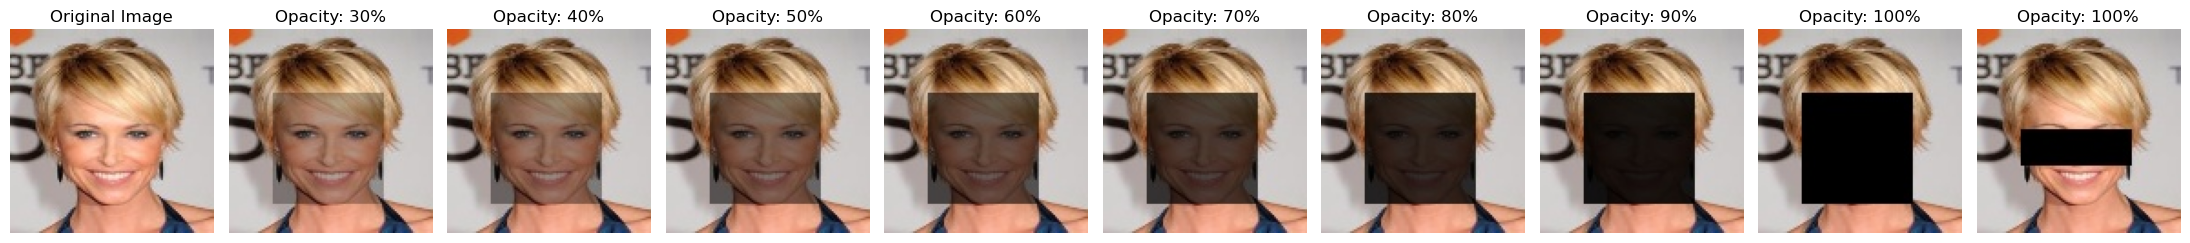

In [85]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory dove sono salvate le immagini con le maschere nere
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'

# Lista dei nomi delle immagini con le maschere nere
mask_image_names = [
    'original_id4929_13.jpg', 'mask_opacity1_id4929_33.jpg', 'mask_opacity2_id4929_33.jpg', 'mask_opacity3_id4929_33.jpg', 
    'mask_opacity4_id4929_33.jpg', 'mask_opacity5_id4929_33.jpg', 'mask_opacity6_id4929_33.jpg', 'mask_opacity7_id4929_33.jpg', 
    'mask_opacity8_id4929_33.jpg', 'mask_opacity9_id4929_33.jpg'
]

# Lista dei livelli di opacità della maschera
mask_opacities = [0, 30, 40, 50, 60, 70, 80, 90, 100, 100]  # L'indice 0 corrisponde all'immagine originale

# Carica le immagini e visualizzale con commenti
fig, axes = plt.subplots(1, len(mask_image_names), figsize=(22, 4))

for i, image_name in enumerate(mask_image_names):
    image_path = os.path.join(target_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    opacity = mask_opacities[i]

    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title('Original Image')
    else:
        axes[i].set_title(f'Opacity: {opacity}%')

plt.tight_layout()
plt.show()


# Creation of the non-mated sub dataset
### save 200 different images of 200 different celebrities (19900 non mated comparisons)

In [3]:
annotation_file = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/identity_CelebA.txt'
annotations = pd.read_csv(annotation_file, delim_whitespace=True, header=None, names=['image', 'celebrity_id'])
# count the number of images for each celebrity
celebrity_counts = Counter(annotations['celebrity_id'])
# Directory delle immagini di CelebA
images_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/CelebA/img_align_celeba'
output_folder = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs'
os.makedirs(output_folder, exist_ok=True)


# function to save one image for a celebrity, resized to 112x112
def save_one_image_for_celebrity(celebrity_id):
    celeb_images = annotations[annotations['celebrity_id'] == celebrity_id]['image']
    first_image = celeb_images.iloc[0]  # Prendi la prima immagine
    img_src_path = os.path.join(images_dir, first_image)
    resized_img = resize_image(img_src_path, (112, 112))  # Ridimensiona l'immagine
    img_dst_path = os.path.join(output_folder, first_image)
    cv2.imwrite(img_dst_path, resized_img)
    return first_image


image_paths = []
print(f"Number of celebrities in the dataset: {annotations['celebrity_id'].nunique()}")

# get IDs of the first 200 unique celebrities
unique_celebrities = annotations['celebrity_id'].unique()[:200]

# Save one image for each of the 200 celebrities
for i, celebrity_id in enumerate(unique_celebrities):
    print(f"Salvataggio dell'immagine per la celebrità {celebrity_id} ({i+1}/{len(unique_celebrities)})")
    image_name = save_one_image_for_celebrity(celebrity_id)
    image_paths.append(f"toy_imgs/{image_name}")



C:\Users\Admin\AppData\Local\Temp\ipykernel_31936\2304831295.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  annotations = pd.read_csv(annotation_file, delim_whitespace=True, header=None, names=['image', 'celebrity_id'])


Number of celebrities in the dataset: 10177
Salvataggio dell'immagine per la celebrità 2880 (1/200)
Salvataggio dell'immagine per la celebrità 2937 (2/200)
Salvataggio dell'immagine per la celebrità 8692 (3/200)
Salvataggio dell'immagine per la celebrità 5805 (4/200)
Salvataggio dell'immagine per la celebrità 9295 (5/200)
Salvataggio dell'immagine per la celebrità 4153 (6/200)
Salvataggio dell'immagine per la celebrità 9040 (7/200)
Salvataggio dell'immagine per la celebrità 6369 (8/200)
Salvataggio dell'immagine per la celebrità 3332 (9/200)
Salvataggio dell'immagine per la celebrità 612 (10/200)
Salvataggio dell'immagine per la celebrità 2807 (11/200)
Salvataggio dell'immagine per la celebrità 7779 (12/200)
Salvataggio dell'immagine per la celebrità 3785 (13/200)
Salvataggio dell'immagine per la celebrità 7081 (14/200)
Salvataggio dell'immagine per la celebrità 1854 (15/200)
Salvataggio dell'immagine per la celebrità 4905 (16/200)
Salvataggio dell'immagine per la celebrità 667 (17/200

### Create img.list for the non-mated comparisons

In [55]:
# Percorso al file img.list
img_list_file = os.path.join('C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs', 'img.list')

# Scrivi i percorsi delle immagini nel file img.list
with open(img_list_file, 'w') as file:
    for path in image_paths:
        file.write(f"{path}\n")

print(f"Elenco delle immagini salvato in {img_list_file}")


Elenco delle immagini salvato in C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/Face_anonymization_experiments/MagFace/inference/toy_imgs\img.list


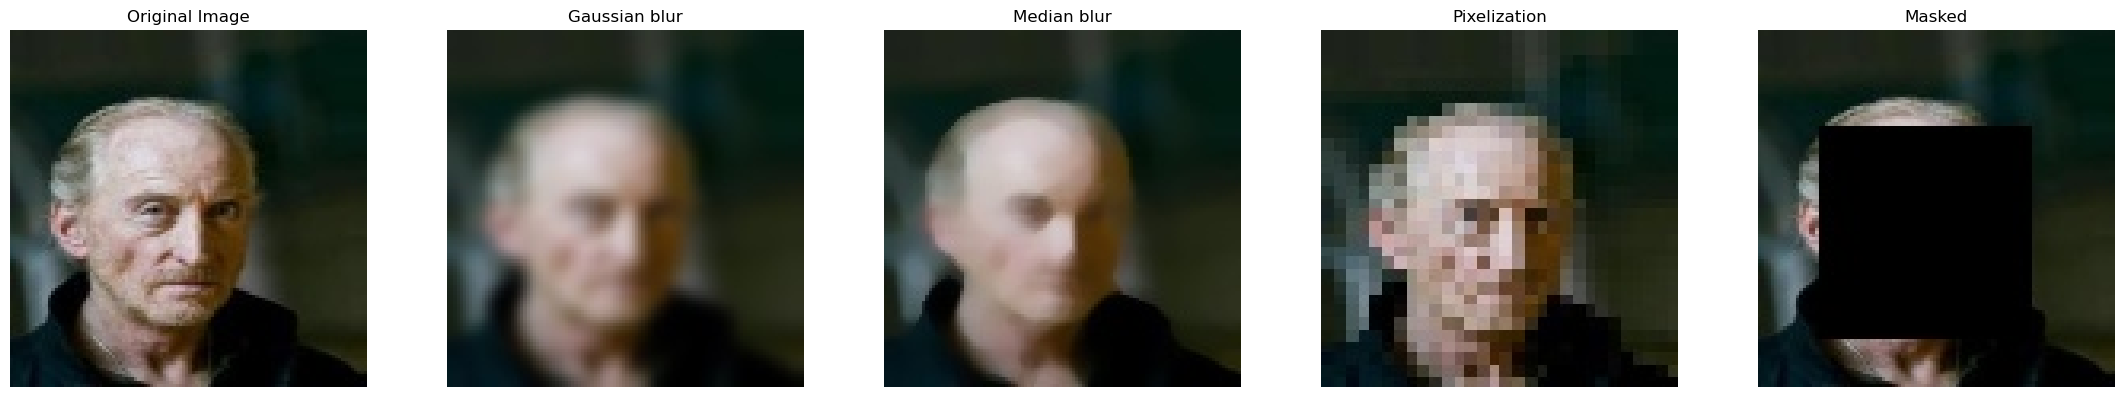

In [105]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory dove sono salvate le immagini pixelizzate
target_dir = 'C:/Users/Admin/Documents/HCAI/BIOMETRIC_SYSTEMS/facesphotos_report/'

# Lista dei nomi delle immagini
blur_image_names = [
    'original_id1735_9.jpg','blur3_id1735_29.jpg', 'median_blur3_id1735_29.jpg', 'pixelization7_id1735_29.jpg', 'mask_opacity8_id1735_29.jpg' ]

# Lista dei livelli di intensità di sfocatura
blur_intensities = [0, 10, 20, 30, 40]  # L'indice 0 corrisponde all'immagine originale

# Carica le immagini e visualizzale con commenti
fig, axes = plt.subplots(1, len(blur_image_names), figsize=(22, 4))

for i, image_name in enumerate(blur_image_names):
    image_path = os.path.join(target_dir, image_name)
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    intensity = blur_intensities[i]

    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    if i == 0:
        axes[i].set_title('Original Image')
    elif i == 1:
        axes[i].set_title(f'Gaussian blur')
    elif i== 2:
        axes[i].set_title(f'Median blur')
    elif i== 3:
        axes[i].set_title(f'Pixelization')
    else:
        axes[i].set_title(f'Masked')

plt.tight_layout()
plt.show()